In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error


In [4]:
# Run this cell to import or install the Data Wrangler widget to show automatic visualization and generate code to fix data quality issues

try:
    import sagemaker_datawrangler
except ImportError:
    !pip install --upgrade sagemaker-datawrangler
    import sagemaker_datawrangler

# Display Pandas DataFrame to view the widget: df, display(df), df.sample()... 

In [11]:
df=pd.read_csv('Fractionator.csv')

In [12]:
from datetime import date
df['Time']=pd.to_datetime(df['Time'])

In [13]:
df=df.set_index('Time')

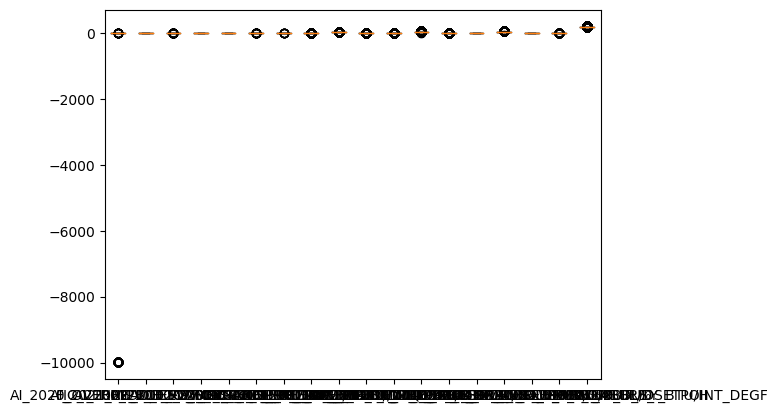

In [14]:
fig, ax = plt.subplots()
ax.boxplot(df.values)
ax.set_xticklabels(df.columns)
plt.show()

In [37]:
manipulated_variables=[
                       "AI_2020_OVERHEAD_C5'S_MOL", 
                       "AI_2021_MIDDLE_C7'S_MOL",
                       "AI_2022_BOTTOM_C3'S_MOL"
                        ]

controlled_variables=[
       'FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D',
       'FIC-2001_OP_TOP_REFLUX_OUTPUT_%',
       'FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D',
       'FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%',
       'FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D',
       'FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%', 
       'TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF'
                    ]

response_variables=[
       'FIC_2100_PV_FEED_FURNACE_FUEL_SCFH',
       'FIC-2101_PV_TOP_PRODUCT_MBBL/D',
        'FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D',
       'FI-2005_PV_FEED_FLOW_MBBL/D',
       'FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D',
       'FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D',
       'FIC_2004_PV_TOP_REFLUX_MBBL/D',
       'QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H',
                    ]

<Figure size 1500x3000 with 0 Axes>

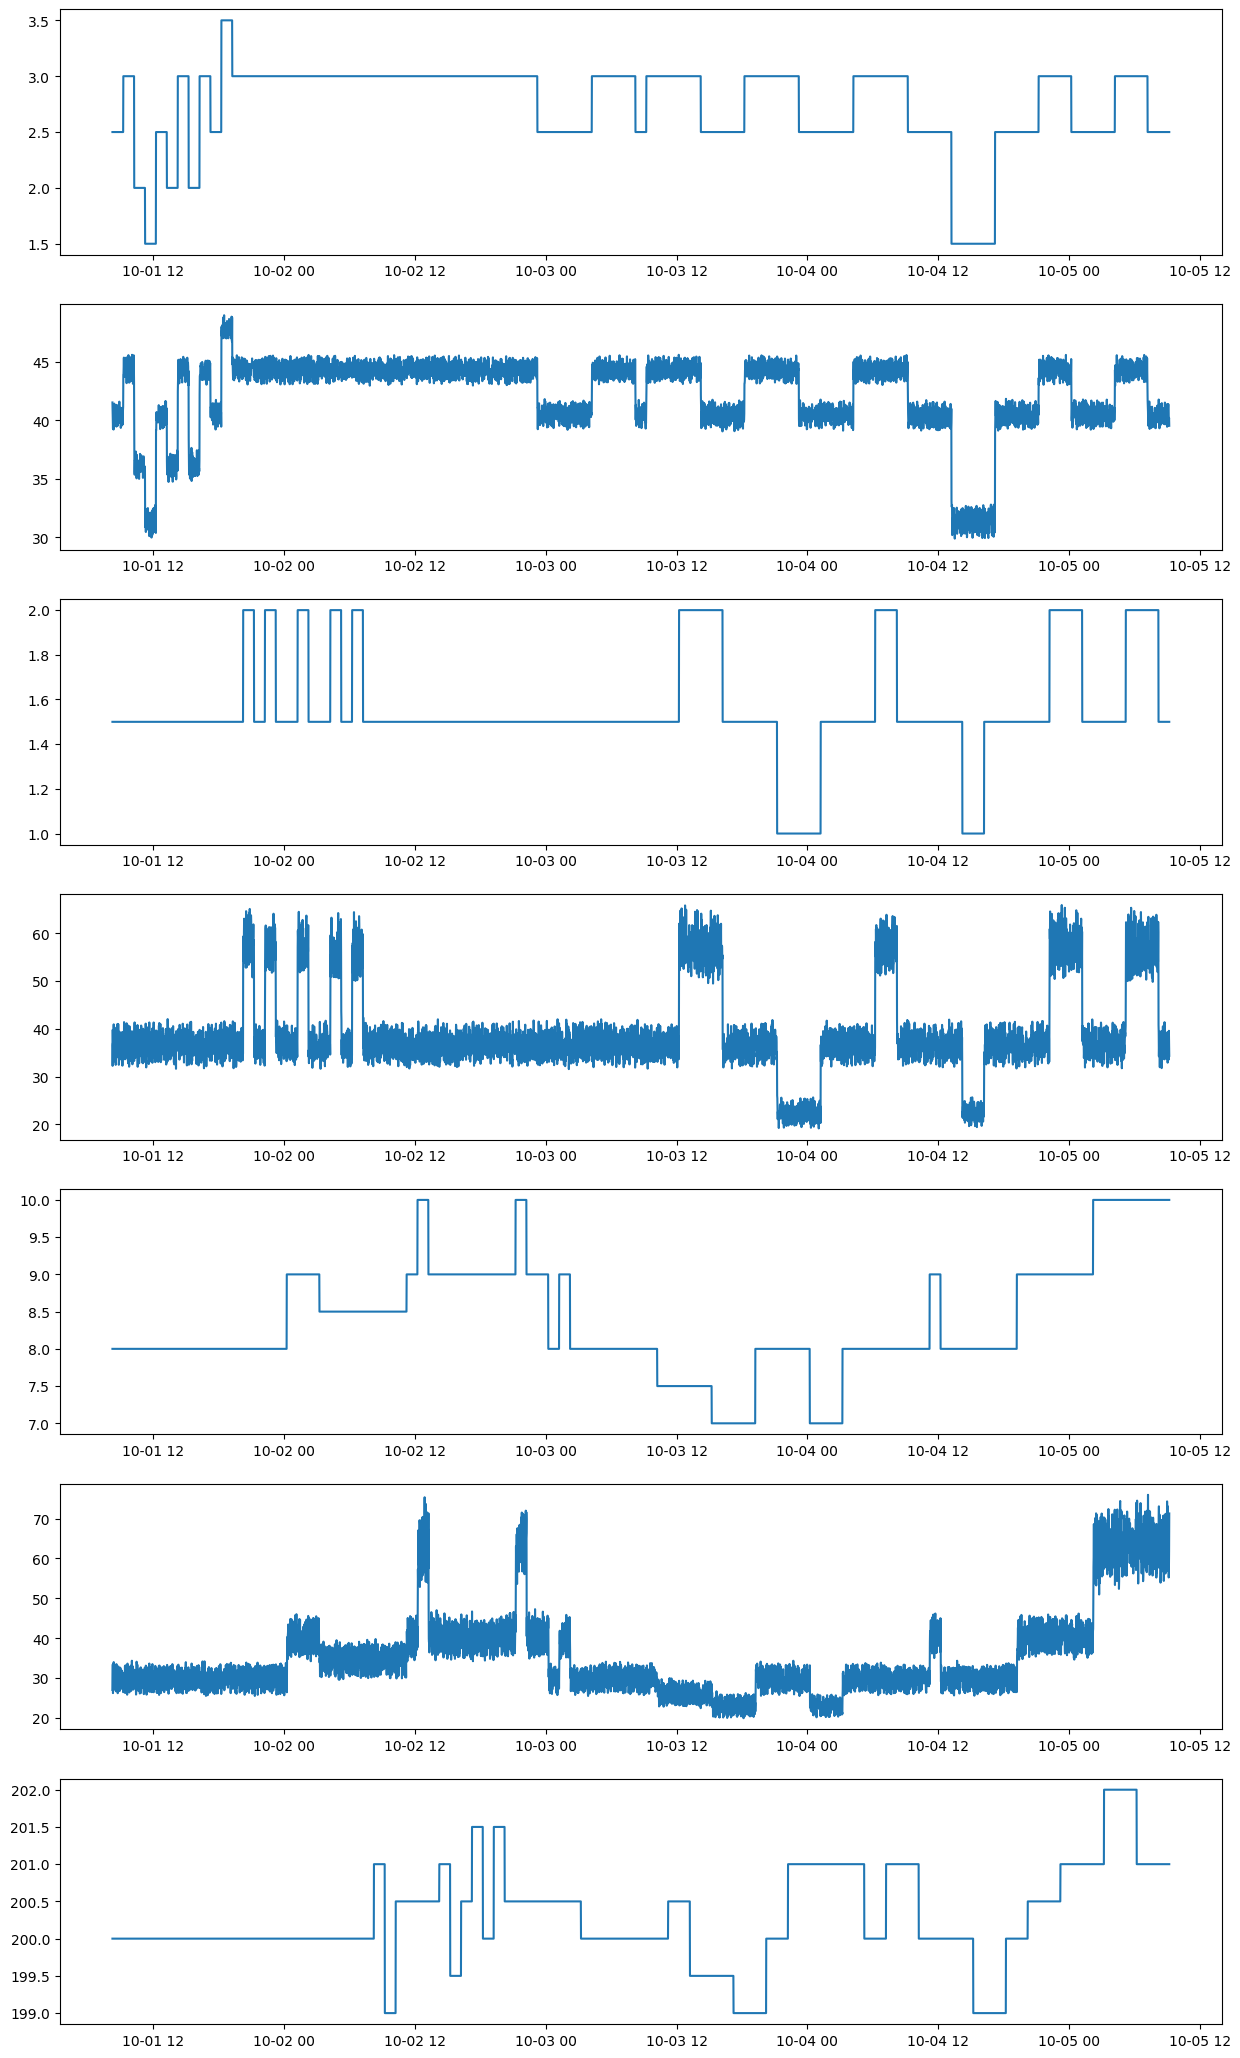

In [23]:
fig1=plt.figure(figsize = (15, 30))

for i in enumerate(controlled_variables):
    plt.subplot(8, 1,i[0]+1)
    plt.plot(df[i[1]])
plt.show()

In [25]:
import seaborn as sns
import numpy as np
import os
from scipy import stats

In [33]:
fig2=plt.figure(figsize = (15, 30))

for i in enumerate(controlled_variables):
    plt.subplot(8, 1,i[0]+1)
    fig2=sns.boxplot(df[i[1]])
    fig2.figure.savefig('boxplot.png')
plt.show()

In [35]:
len(manipulated_variables)

3

In [36]:
fig3=plt.figure(figsize = (15, 30))

for i in enumerate(manipulated_variables):
    plt.subplot(len(manipulated_variables)+1, 1,i[0]+1)
    fig3=sns.boxplot(df[i[1]])
    fig3.figure.savefig('boxplot_manipulated_variables.png')
plt.show()

In [38]:
fig4=plt.figure(figsize = (15, 30))

for i in enumerate(response_variables):
    plt.subplot(len(response_variables)+1, 1,i[0]+1)
    fig3=sns.boxplot(df[i[1]])
    fig3.figure.savefig('boxplot_response_variables.png')
plt.show()

In [39]:
df=df[(np.abs(stats.zscore(df["AI_2020_OVERHEAD_C5'S_MOL"])) < 3)]

In [ ]:
plt.figure(figsize = (15, 30))
for i in enumerate(manipulated_variables):
    plt.subplot(3, 1,i[0]+1)
    plt.plot(good_data["Time"],good_data[i[1]])
    plt.title(good_data[manipulated_variables].columns[i[0]])
    plt.xlabel('Time')
    plt.ylabel(good_data[manipulated_variables].columns[i[0]])
   # plt.gcf().autofmt_xdate()
    hours = mdates.HourLocator(interval=6)
    hours_fmt = mdates.DateFormatter('%H-%D')
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_major_formatter(hours_fmt)
    plt.xticks(rotation = 45)


plt.show()

In [ ]:
plt.figure(figsize = (15, 30))
for i in enumerate(reponse_variables):
    plt.subplot(8, 1,i[0]+1)
    plt.plot(good_data["Time"],good_data[i[1]])
    plt.title(good_data[reponse_variables].columns[i[0]])
    plt.xlabel('Time')
    plt.ylabel(good_data[reponse_variables].columns[i[0]])
   # plt.gcf().autofmt_xdate()
    hours = mdates.HourLocator(interval=6)
    hours_fmt = mdates.DateFormatter('%H-%D')
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_major_formatter(hours_fmt)
    plt.xticks(rotation = 45)


plt.show()

In [ ]:
FIC_reflux_top=['FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D','FIC-2001_OP_TOP_REFLUX_OUTPUT_%','FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D']
FIC_reflux_middle=[ 'FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D',
       'FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%',
       'FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D']
FIC_reflux_bottom=['FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D',
       'FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%', 'FIC_2004_PV_TOP_REFLUX_MBBL/D']
furnace=['FIC_2100_PV_FEED_FURNACE_FUEL_SCFH','TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF']

In [ ]:
plt.figure(figsize = (15, 5))
for i in enumerate(furnace):
    plt.plot(df["Time"],df[i[1]])
    hours = mdates.HourLocator(interval=6)
    hours_fmt = mdates.DateFormatter('%H-%D')
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_major_formatter(hours_fmt)
    plt.xticks(rotation = 45)
    plt.yticks([0,25,50,195,198,200,202,205])
plt.show()

In [ ]:
plt.figure(figsize = (15, 5))
for i in enumerate(FIC_reflux_middle):
    plt.plot(good_data["Time"],good_data[i[1]])
    hours = mdates.HourLocator(interval=6)
    hours_fmt = mdates.DateFormatter('%H-%D')
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_major_formatter(hours_fmt)
    plt.xticks(rotation = 45)
    #plt.yticks([0,25,50,195,198,200,202,205])
plt.show()

In [ ]:
target=good_data[manipulated_variables]
data=good_data[controlled_variables+reponse_variables]

In [ ]:
data.corr()

In [ ]:
#find the correlation between features
plt.figure(figsize=(40,40))
fig3=sns.heatmap(good_data.corr(method='spearman'),vmin=-1,vmax=1,cmap= 'seismic',annot=True,square=True)
fig3.figure.savefig('heat map correlation.png')
plt.show()